Today's story is about using machine learning techniques in order to  classify if an email is spam or not.The first step is to load the data which consists of two useful columns: the first is the class and the second is the message of the email.Lets import the data and then extract some useful info about it:

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
print(df.head())
print(df.columns)
print(df.isnull().sum())
print(df.info)
print(df.describe())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64
<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok 

In [ ]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

Because the data has some weird inputs I used the extension for encoding in pd.read_csv() statement. Now I will rename the two columns as class and text.

In [ ]:
new_column_names = {"v1":"Class","v2":"Text"}
df.rename(columns = new_column_names,inplace = True)

The next step is to preprocess the data in order to be ready for modeling.Moreover, I will start by removing duplicates.

In [ ]:
df = df.drop_duplicates()

At this point we are going to see the shape, info  and the values from the emails.

In [ ]:
print(df.shape[0])
print(df['Class'].value_counts())
print(df.info())

5169
ham     4516
spam     653
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5169 non-null   object
 1   Text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB
None


We can claim that the majority of the emails are ham and we are going to visualize the above conclusion.

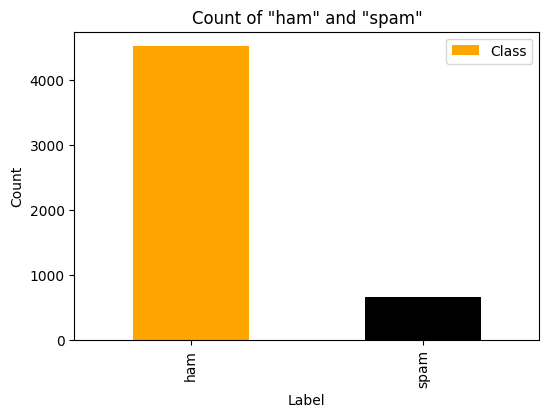

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Using Matplotlib
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
df['Class'].value_counts().plot(kind='bar', color=['orange', 'black'])
plt.title('Count of "ham" and "spam"')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend()
plt.show()


Now we will preprocess the data in order to be fed to the machine learning algorithms. I will map the ham and spam class into integers and then the splitting of the data follows.

In [ ]:
df.loc[df["Class"] == "spam", "Class"] = 0
df.loc[df["Class"] == "ham", "Class"] = 1

In [ ]:
from sklearn.model_selection import train_test_split
X = df['Text']
Y = df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Now using sklearn library, the raw text is going to be numerically converted through TfidfVectorizer.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

in order to understand the difference:

In [ ]:
print(X_train_features[0],'->',X_train[0])

  (0, 3545)	0.7455593142248959
  (0, 2588)	0.6664392762829205 -> Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


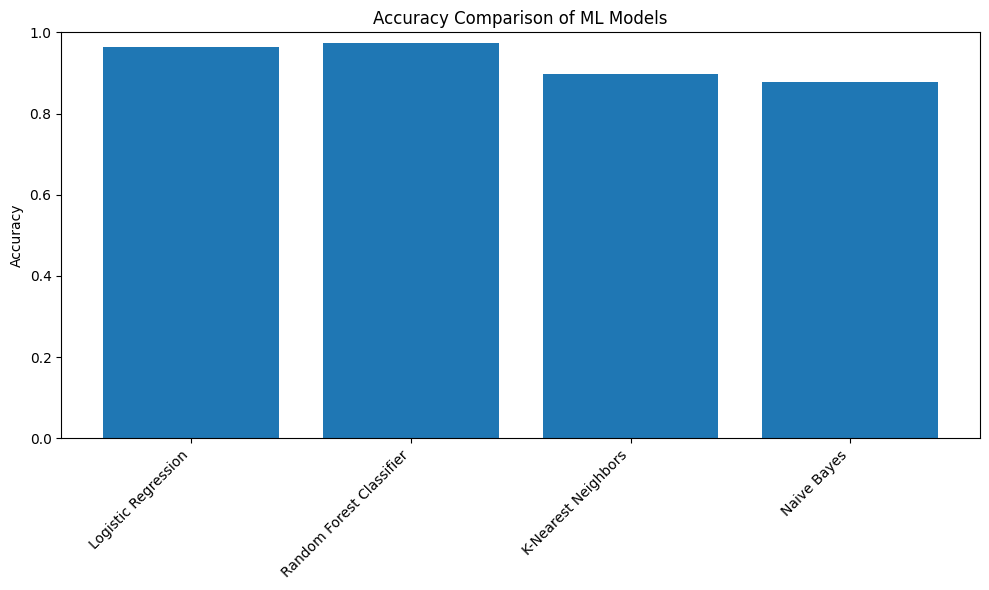

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Create and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train_features.toarray(), Y_train)
    y_pred = model.predict(X_test_features.toarray())
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies[name] = accuracy

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.ylim([0, 1])  # Set the y-axis limits
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of ML Models')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Logistic Regression Accuracy: 0.96
Random Forest Classifier Accuracy: 0.98
K-Nearest Neighbors Accuracy: 0.90
Naive Bayes Accuracy: 0.88


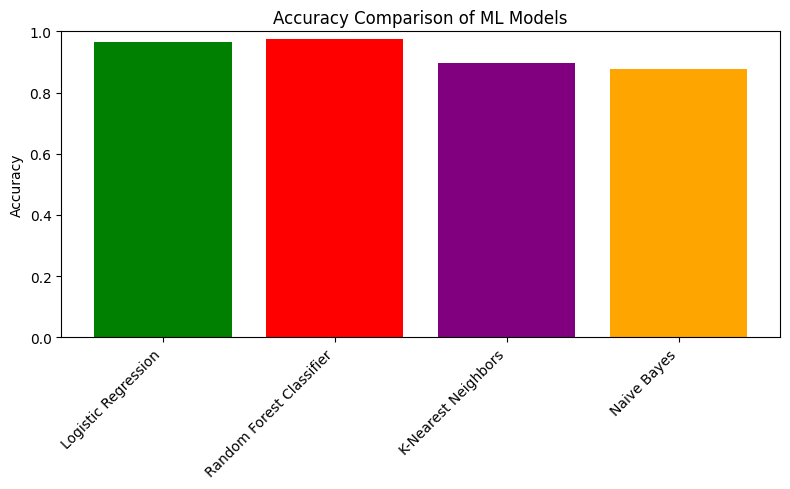

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),

}

accuracies = {}

colors = ['green', 'red', 'purple', 'orange']

plt.figure(figsize=(8, 5))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_features.toarray(), Y_train)
    y_pred = model.predict(X_test_features.toarray())
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')

    # Plot accuracy with a different color for each model
    plt.bar(name, accuracy, color=colors[i])

# Set the y-axis limits
plt.ylim([0, 1])

plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of ML Models')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

All in all we see some excellent results with the RFC to be the best model with 97% of accuracy and similar to it the logistic regression model with 96%. You can try this with an email of your likelihood and check if it is spam or not.I hope this article will help you better understand machine learning concepts and feel free to ask whatever you want!